# Forecasting with Deep Learning

Deep learning models have become increasingly popular for time series forecasting, especially when traditional statistical approaches struggle to capture non-linear relationships or complex temporal patterns. By leveraging neural network architectures, deep learning methods can automatically learn features and dependencies directly from raw data, offering significant advantages for large datasets, multivariate time series, and problems where classic models fall short

## Introduction to Recurrent Neural Networks (RNN), LSTM, and GRU

**Recurrent Neural Networks (RNN)** are a family of models specifically designed to work with sequential data, such as time series. Unlike traditional feedforward neural networks, which treat each input independently, RNNs introduce an internal memory that allows them to capture dependencies between elements of a sequence. This enables the model to leverage information from previous steps to improve future predictions.

The fundamental building block of an RNN is the **recurrent cell**, which receives two inputs at each time step: the current data point and the previous hidden state (the "memory" of the network). At every step, the hidden state is updated, storing relevant information about the sequence up to that point. This architecture allows RNNs to “remember” trends and patterns over time.

However, simple RNNs face difficulties when learning long-term dependencies due to issues like the vanishing or exploding gradient problem. To address these limitations, more advanced architectures such as **Long Short-Term Memory (LSTM)** and **Gated Recurrent Unit (GRU)** were developed. These variants are better at capturing complex and long-range patterns in time series data.

<p style="text-align: center">
    <img src='../img/schema-rnn-model.jpg'style="width: 600px">
    <br>
    <font size='2.5'> <i>Basic RNN diagram. Source: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (1st ed.) [PDF]. Springer.</i></font>
</p>

**Types of Recurrent Layers in skforecast**

With skforecast, you can use three main types of recurrent cells:

+ **Simple RNN:** Suitable for problems with short-term dependencies or when a simple model is sufficient. Less effective for capturing long-range patterns.

+ **LSTM (Long Short-Term Memory):** Adds gating mechanisms that allow the network to learn and retain information over longer periods. LSTMs are a popular choice for many complex forecasting problems.

+ **GRU (Gated Recurrent Unit):** Offers a simpler structure than LSTM, using fewer parameters while achieving comparable performance in many scenarios. Useful when computational efficiency is important.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

Guidelines for choosing a recurrent layer:

<ul>
    <li>
    Use <b>LSTM</b> if your time series contains long-term patterns or complex dependencies.
    </li>
    <li>
    Try <b>GRU</b> as a lighter alternative to LSTM.
    </li>
    <li>
    Use <b>Simple RNN</b> only for straightforward tasks or as a baseline.
    </li>
</ul>

</div>

## LSTM Architecture and Gates

**Long Short-Term Memory (LSTM)** networks are a widely used type of recurrent neural network designed to effectively capture **long-range dependencies in sequential data**. Unlike simple RNNs, LSTMs use a more sophisticated architecture based on a system of memory cells and gates that control the flow of information over time.

The core component of an LSTM is the **memory cell**, which maintains information across time steps. Three gates regulate how information is added, retained, or discarded at each step:

+ **Forget Gate:** Decides which information from the previous cell state should be removed. It uses the current input and previous hidden state, applying a sigmoid activation to produce a value between 0 and 1 (where 0 means “completely forget” and 1 means “completely keep”).

+ **Input Gate:** Controls how much new information is added to the cell state, again using the current input and previous hidden state with a sigmoid activation.

+ **Output Gate:** Determines how much of the cell state is exposed as output and passed to the next hidden state.

This gating mechanism enables LSTMs to selectively remember or forget information, making them highly effective for modeling sequences with long-term patterns.

<p style="text-align: center">
    <img src='https://databasecamp.de/wp-content/uploads/lstm-architecture-1024x709.png'style="width: 400px">
    <br>
    <font size='2.5'> <i>Diagram of the inputs and outputs of an LSTM. Source: codificandobits https://databasecamp.de/wp-content/uploads/lstm-architecture-1024x709.png.</i></font>
</p>

**Gated Recurrent Unit (GRU)** cells are a simplified alternative to LSTMs, using only two gates (reset and update) but often achieving similar performance. GRUs require fewer parameters and can be computationally more efficient, which may be an advantage for some tasks or larger datasets.

<div class="admonition note" name="html-admonition" style="background: rgba(0,191,191,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00bfa5; border-color: #00bfa5; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00bfa5;"></i>
    <b style="color: #00bfa5;">&#128161 Tip</b>
</p>

To learn more about forecasting with deep learning  models visit our examples:

<ul>
    <li>
    <a href="https://www.cienciadedatos.net/documentos/py54-forecasting-with-deep-learning.html">Deep Learning for time series forecasting: Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM)</a>.
    </li>
</ul>

</div>

## Libraries and data

<div class="admonition note" name="html-admonition" style="background: rgba(255,145,0,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #ff9100; border-color: #ff9100; padding-left: 10px; padding-right: 10px">

<p class="title">
    <i style="font-size: 18px; color:#ff9100; border-color: #ff1744;"></i>
    <b style="color: #ff9100;"> <span style="color: #ff9100;">&#9888;</span> Warning</b>
</p>

skforecast supports multiple Keras backends: <b>TensorFlow</b>, <b>JAX</b>, and <b>PyTorch (torch)</b>.
You can select the backend using the <code>KERAS_BACKEND</code> environment variable, or by editing your local configuration file at <code>~/.keras/keras.json</code>.

```python
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # Options: "tensorflow", "jax", or "torch"
import keras
```

The backend must be set before importing Keras in your Python session. Once Keras is imported, the backend cannot be changed without restarting your Python process.

Alternatively, you can set the backend in your configuration file at <code>~/.keras/keras.json</code>:

```json
{
    "backend": "tensorflow"  # Options: "tensorflow", "jax", or "torch"
}
```

</div>

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent.parent)
print(path)
sys.path.insert(1, path)

import numpy as np
import pandas as pd

c:\Users\jaesc2\GitHub\skforecast


In [ ]:
# Libraries
# ==============================================================================
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # 'tensorflow', 'jax´ or 'torch'
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import skforecast
from skforecast.plot import set_dark_theme
from skforecast.datasets import fetch_dataset
from skforecast.deep_learning import ForecasterRnn
from skforecast.deep_learning.utils import create_and_compile_model
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import backtesting_forecaster_multiseries
from skforecast.plot import plot_prediction_intervals

from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('once')

print(f"skforecast version: {skforecast.__version__}")
print(f"keras version: {keras.__version__}")
print(f"Using backend: {keras.backend.backend()}")
if keras.backend.backend() == "tensorflow":
    import tensorflow
    print(f"tensorflow version: {tensorflow.__version__}")
elif keras.backend.backend() == "torch":
    import torch
    print(f"torch version: {torch.__version__}")
else:
    print("Backend not recognized. Please use 'tensorflow' or 'torch'.")

skforecast version: 0.17.0
keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0


In [ ]:
# Data download
# ==============================================================================
data = fetch_dataset(name="air_quality_valencia_no_missing")
data.head()

In [3]:
# TODO: Remove this line after testing
data = pd.read_csv(
    r"C:\Users\jaesc2\Downloads\air_quality_valencia_no_missing.csv", sep=','
)
data = data.set_index('datetime')
data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S')
data = data.asfreq('h')
data = data.sort_index()

In [4]:
# Checking the frequency of the time series
# ==============================================================================
print(f"Index: {data.index.dtype}")
print(f"Frequency: {data.index.freq}")

Index: datetime64[ns]
Frequency: <Hour>


In [5]:
# Split train-validation-test
# ==============================================================================
data = data.loc["2019-01-01 00:00:00":"2021-12-31 23:59:59", :].copy()

end_train = "2021-03-31 23:59:00"
end_validation = "2021-09-30 23:59:00"
data_train = data.loc[:end_train, :].copy()
data_val = data.loc[end_train:end_validation, :].copy()
data_test = data.loc[end_validation:, :].copy()

print(
    f"Dates train      : {data_train.index.min()} --- " 
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Dates validation : {data_val.index.min()} --- " 
    f"{data_val.index.max()}  (n={len(data_val)})"
)
print(
    f"Dates test       : {data_test.index.min()} --- " 
    f"{data_test.index.max()}  (n={len(data_test)})"
)

Dates train      : 2019-01-01 00:00:00 --- 2021-03-31 23:00:00  (n=19704)
Dates validation : 2021-04-01 00:00:00 --- 2021-09-30 23:00:00  (n=4392)
Dates test       : 2021-10-01 00:00:00 --- 2021-12-31 23:00:00  (n=2208)


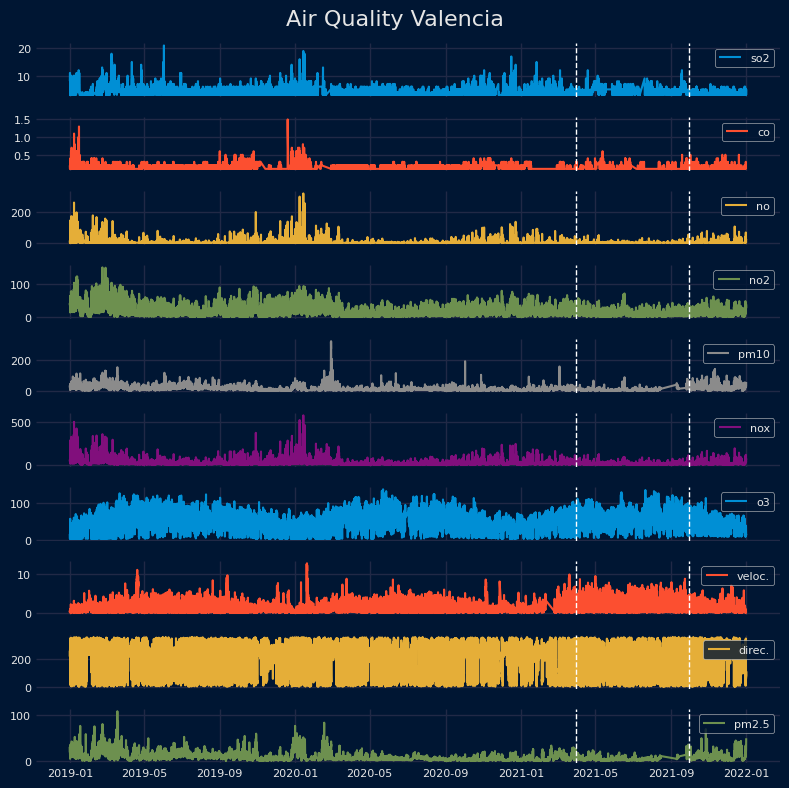

In [68]:
# Plot series
# ==============================================================================
set_dark_theme()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] * 2
fig, axes = plt.subplots(len(data.columns), 1, figsize=(8, 8), sharex=True)

for i, col in enumerate(data.columns):
    axes[i].plot(data[col], label=col, color=colors[i])
    axes[i].legend(loc='upper right', fontsize=8)
    axes[i].tick_params(axis='both', labelsize=8)
    axes[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)  # End train
    axes[i].axvline(pd.to_datetime(end_validation), color='white', linestyle='--', linewidth=1)  # End validation

fig.suptitle("Air Quality Valencia", fontsize=16)
plt.tight_layout()

## Building RNN-based models easily with `create_and_compile_model`

skforecast provides the utility function `create_and_compile_model` to simplify the creation of recurrent neural network architectures (RNN, LSTM, or GRU) for time series forecasting. This function is designed to make it easy for both beginners and advanced users to build and compile custom **Keras** models with just a few lines of code.

**Basic usage**

For most forecasting scenarios, you can specify the time series data, the number of lagged observations, the number of steps to predict, and the type of recurrent layer you wish to use ([LSTM](https://keras.io/api/layers/recurrent_layers/lstm/), [GRU](https://keras.io/api/layers/recurrent_layers/gru/), or [SimpleRNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/)). By default, the function sets reasonable parameters for each layer, but all architectural details can be adjusted to fit specific requirements.

In [7]:
# Basic usage of `create_and_compile_model`
# ==============================================================================
model = create_and_compile_model(
            series          = data,    # All series are used as predictors
            levels          = ["o3"],  # Target series to predict
            lags            = 24,      # Number of lags to use as predictors
            steps           = 10,      # Number of steps to predict
            recurrent_layer = "LSTM",  # Type of recurrent layer ('LSTM', 'GRU', or 'RNN')
            recurrent_units = 100,     # Number of units in the recurrent layer
            dense_units     = 64       # Number of units in the dense layer
        )
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ series_input (InputLayer)       │ (None, 24, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_td_layer (Dense)   │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 10, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,514 (201.23 KB)

 Trainable params: 51,514 (201.23 KB)

 Non-trainable params: 0 (0.00 B)

**Advanced customization**

All arguments controlling layer types, units, activations, and other options can be customized. You may also pass your own Keras model if you need full flexibility beyond what the helper function provides.

The arguments `recurrent_layers_kwargs` and `dense_layers_kwargs` allow you to specify the parameters for the recurrent and dense layers, respectively. 

+ When using a dictionary, the kwargs are replayed for each layer of the same type. For example, if you specify `recurrent_layers_kwargs = {'activation': 'tanh'}`, all recurrent layers will use the `tanh` activation function. 

+ You can also pass a list of dictionaries to specify different parameters for each layer. For instance, `recurrent_layers_kwargs = [{'activation': 'tanh'}, {'activation': 'relu'}]` will create two recurrent layers with different activations.

In [8]:
# Advance usage of `create_and_compile_model`
# ==============================================================================
model = create_and_compile_model(
    series                    = data,
    levels                    = ["o3"], 
    lags                      = 24,
    steps                     = 10,
    exog                      = None,  # No exogenous variables
    recurrent_layer           = "LSTM",    
    recurrent_units           = [128, 64],  
    recurrent_layers_kwargs   = [{'activation': 'tanh'}, {'activation': 'relu'}],
    dense_units               = [128, 64],
    dense_layers_kwargs       = {'activation': 'relu'},
    output_dense_layer_kwargs = {'activation': 'linear'},
    compile_kwargs            = {'optimizer': Adam(learning_rate=0.01), 'loss': MeanSquaredError()},
    model_name                = None
)
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ series_input (InputLayer)       │ (None, 24, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_td_layer (Dense)   │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 10, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,802 (538.29 KB)

 Trainable params: 137,802 (538.29 KB)

 Non-trainable params: 0 (0.00 B)

Visit the [full API documentation](../api/forecasterrnn.html#skforecast.deep_learning.utils.create_and_compile_model) for `create_and_compile_model` for more details.

If you need to define a **completely custom architecture**, you can create your own Keras model and use it directly in skforecast workflows.

In [ ]:
# Plotting the model architecture (require `pydot` and `graphviz`)
# ==============================================================================
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model-architecture.png')

<p style="text-align: center">
    <img src='../img/model-architecture.png'style="width: 300px">
</p>

## Types of problems in time series forecasting

Deep learning models for time series can address various forecasting scenarios, depending on the nature of the data and the prediction task. In this user guide, we will focus on the following types of problems:

### 1. Single-Series, Single-Step Forecasting (1:1)

In this scenario, the goal is to predict the next value in a single time series, using only its own past observations as input. This is known as a univariate autoregressive forecasting problem.

For example:
Given a sequence of values ${y_{t-3}, y_{t-2}, y_{t-1}}$, predict $y_t$.

This setup is common for classic time series tasks and serves as a good starting point for experimenting with deep learning models.

In [14]:
# Create model
# ==============================================================================
model = create_and_compile_model(
    series                  = data[["o3"]],  # Only the 'o3' series is used as predictor
    levels                  = ["o3"],        # Target series to predict
    lags                    = 24,            # Number of lags to use as predictors
    steps                   = 1,             # Single-step forecasting
    recurrent_layer         = "GRU",
    recurrent_units         = 64,
    recurrent_layers_kwargs = {"activation": "tanh"},
    dense_units             = 32,
    compile_kwargs          = {'optimizer': 'adam', 'loss': 'mse'},
    model_name              = "Single-Series-Single-Step" 
)
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\IPython\extensions\deduperreload\deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ series_input (InputLayer)       │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_td_layer (Dense)   │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Forecaster Definition
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=["o3"],
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 50,  # Number of epochs to train the model.
        "batch_size": 256,  # Batch size to train the model.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val,  # Validation data for model training.
    },
)    

forecaster

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 16 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


============= 
ForecasterRnn 
============= 
Regressor: <Functional name=functional_3, built=True> 
Layers names: ['series_input', 'gru_1', 'dense_1', 'output_dense_td_layer', 'reshape_3'] 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Maximum steps to predict: [1] 
Series names: None 
Target series (levels): ['o3'] 
Exogenous included: False 
Exogenous names: None 
Transformer for series: MinMaxScaler() 
Transformer for exog: MinMaxScaler() 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'name': 'functional_3', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'series_input'}, 'registered_name': None, 'name': 'series_input', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 1]}, 'name': 'gru_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 1), 'dtype': 'float32', 'keras_history': ['series_input', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 32, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64]}, 'name': 'dense_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 64), 'dtype': 'float32', 'keras_history': ['gru_1', 0, 0]}},), 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'output_dense_td_layer', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32]}, 'name': 'output_dense_td_layer', 'inbound_nodes': [{'args': ({'class_name': '_

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

The **skforecast** library is fully compatible with GPUs. See the **Running in GPU** section below in this document for more information.
</div>

In [16]:
# Fit forecaster
# ==============================================================================
forecaster.fit(data_train[['o3']])

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0570 - val_loss: 0.0086
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0053 - val_loss: 0.0056
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0

Overfitting can be tracked by moniting the loss function on the validation set. Metrics are automatically stored in the `history` attribute of the `ForecasterRnn` object. The method `plot_history()` can be used to visualize the training and validation loss.

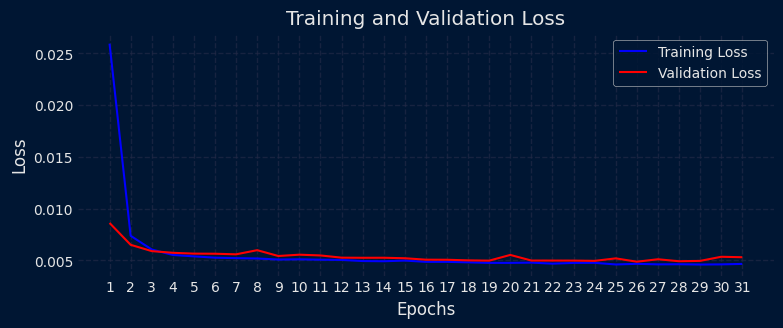

In [19]:
# Track training and overfitting
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
_ = forecaster.plot_history(ax=ax)

In [20]:
# Predictions
# ==============================================================================
predictions = forecaster.predict()
predictions

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\tensorflow\python\framework\ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())


,level,pred
2021-04-01,o3,44.742233


In [21]:
# Backtesting with test data
# ==============================================================================
cv = TimeSeriesFold(
         steps              = forecaster.max_step,
         initial_train_size = len(data.loc[:end_validation, :]),  # Training + Validation Data
         refit              = False
     )

metrics, predictions = backtesting_forecaster_multiseries(
    forecaster  = forecaster,
    series      = data[['o3']],
    cv          = cv,
    levels      = forecaster.levels,
    metric      = "mean_absolute_error",
)

Epoch 1/50


c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)


95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0047 - val_loss: 0.0054
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0047 - val_l

  0%|          | 0/2208 [00:00<?, ?it/s]

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\tensorflow\python\framework\ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\tensorflow\python\framework\ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\tensorflow\python\framework\ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing 

In [22]:
# Backtesting predictions
# ==============================================================================
predictions

,level,pred
2021-10-01 00:00:00,o3,54.388725
2021-10-01 01:00:00,o3,58.174248
2021-10-01 02:00:00,o3,61.358513
2021-10-01 03:00:00,o3,61.337482
2021-10-01 04:00:00,o3,51.653255
...,...,...
2021-12-31 19:00:00,o3,14.850871
2021-12-31 20:00:00,o3,12.379782
2021-12-31 21:00:00,o3,13.733571
2021-12-31 22:00:00,o3,13.798273


In [23]:
# % Error vs series mean
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Serie mean: {np.mean(data['o3']):0.2f}")
print(f"Relative error (mae): {rel_mse:0.2f} %")

Serie mean: 54.52
Relative error (mae): 10.42 %


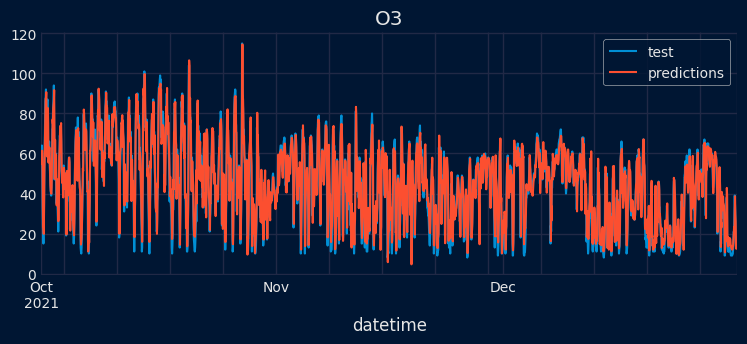

In [24]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["o3"].plot(ax=ax, label="test")
predictions.loc[predictions["level"] == "o3", "pred"].plot(ax=ax, label="predictions")
ax.set_title("O3")
ax.legend();

### 2. Single-Series, Multi-Step Forecasting (1:1, Multiple Steps)

In this scenario, the objective is to predict multiple future values of a single time series using only its own past observations as input. This is known as **multi-step univariate forecasting**.

For example:
Given a sequence of values ${y_{t-24}, ..., y_{t-1}}$, predict ${y_t, y_{t+1}, ..., y_{t+h}}$, where $h$ is the prediction horizon (number of steps ahead).

This setup is common when you want to forecast several periods into the future (e.g., the next 24 hours of ozone concentration).

**Model Architecture**

You can use a similar network architecture as in the single-step case, but predicting multiple steps ahead usually benefits from increasing the capacity of the model (e.g., more units in LSTM/GRU layers or additional dense layers). This allows the model to better capture the complexity of forecasting several points at once.

In [25]:
# Create model
# ==============================================================================
model = create_and_compile_model(
    series                  = data[["o3"]],  # Only the 'o3' series is used as predictor
    levels                  = ["o3"],        # Target series to predict
    lags                    = 24,            # Number of lags to use as predictors
    steps                   = 24,            # multi-step forecasting
    recurrent_layer         = "GRU",
    recurrent_units         = 128,
    recurrent_layers_kwargs = {"activation": "tanh"},
    dense_units             = 64,
    compile_kwargs          = {'optimizer': 'adam', 'loss': 'mse'},
    model_name              = "Single-Series-Multi-Step" 
)
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



Model: "Single-Series-Multi-Step"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ series_input (InputLayer)       │ (None, 24, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_td_layer (Dense)   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 24, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,120 (234.84 KB)

 Trainable params: 60,120 (234.84 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Forecaster Creation
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=["o3"],
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 50, 
        "batch_size": 512, 
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val,  # Validation data for model training.
    },
)

forecaster

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 16 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


============= 
ForecasterRnn 
============= 
Regressor: <Functional name=Single-Series-Multi-Step, built=True> 
Layers names: ['series_input', 'gru_1', 'dense_1', 'output_dense_td_layer', 'reshape_4'] 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Maximum steps to predict: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Series names: None 
Target series (levels): ['o3'] 
Exogenous included: False 
Exogenous names: None 
Transformer for series: MinMaxScaler() 
Transformer for exog: MinMaxScaler() 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'name': 'Single-Series-Multi-Step', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'series_input'}, 'registered_name': None, 'name': 'series_input', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 1]}, 'name': 'gru_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 1), 'dtype': 'float32', 'keras_history': ['series_input', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 128]}, 'name': 'dense_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 128), 'dtype': 'float32', 'keras_history': ['gru_1', 0, 0]}},), 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'output_dense_td_layer', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 24, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_s

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

The <code>fit_kwargs</code> parameter lets you customize any aspect of the model training process, passing arguments directly to the underlying TensorFlow <code>Model.fit()</code> method. For example, you can specify the number of training epochs, batch size, and any callbacks you want to use.

In the code example, the model is trained for <b>50 epochs</b> with a <b>batch size of 512</b>. The <code>EarlyStopping</code> callback monitors the validation loss and automatically stops training if it does not improve for 5 consecutive epochs (<code>patience=5</code>). This helps prevent overfitting and saves computation time.

You can also add other callbacks, such as <code>ModelCheckpoint</code> to save the model at each epoch, or <code>TensorBoard</code> for real-time visualization of training and validation metrics.

</div>

In [27]:
# Fit forecaster
# ==============================================================================
forecaster.fit(data_train[['o3']])

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.1156 - val_loss: 0.0314
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0293 - val_loss: 0.0280
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0267 - val_loss: 0.0252
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0247 - val_loss: 0.0226
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0226 - val_loss: 0.0198
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0209 - val_loss: 0.0192
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0200 - val_loss: 0.0191
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0198 - val_loss: 0.0179
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0195 - val_loss: 0.0177
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0193 - val_loss: 0.0176
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0189 - val_loss: 0.0173
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0

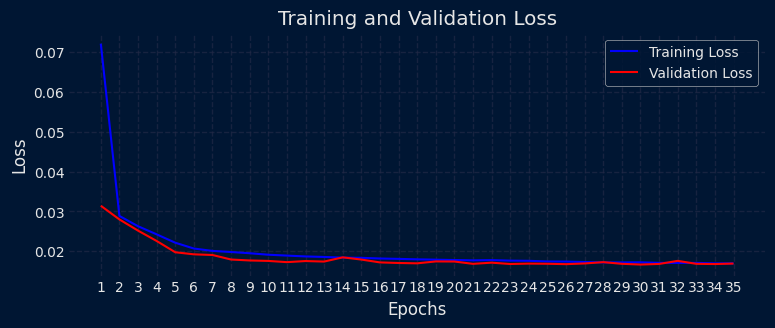

In [29]:
# Train and overfitting tracking
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
_ = forecaster.plot_history(ax=ax)

In [31]:
# Prediction
# ==============================================================================
predictions = forecaster.predict()
predictions.head(4)

,level,pred
2021-04-01 00:00:00,o3,50.629280
2021-04-01 01:00:00,o3,46.487106
2021-04-01 02:00:00,o3,43.990551
2021-04-01 03:00:00,o3,40.617538


In [32]:
# Specific step predictions
# ==============================================================================
predictions = forecaster.predict(steps=[1, 3])
predictions

,level,pred
2021-04-01 00:00:00,o3,50.629280
2021-04-01 02:00:00,o3,43.990551


In [33]:
# Backtesting 
# ==============================================================================
cv = TimeSeriesFold(
         steps              = forecaster.max_step,
         initial_train_size = len(data.loc[:end_validation, :]),  # Training + Validation Data
         refit              = False
     )

metrics, predictions = backtesting_forecaster_multiseries(
    forecaster        = forecaster,
    series            = data[['o3']],
    cv                = cv,
    levels            = forecaster.levels,
    metric            = "mean_absolute_error",
    suppress_warnings = True
)

Epoch 1/50


c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0168 - val_loss: 0.0165
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0167 - val_loss: 0.0164
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0167 - val_loss: 0.0163
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0168 - val_loss: 0.0162
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0165 - val_loss: 0.0164
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0166 - val_loss: 0.0163
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0165 - val_loss: 0.0162
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0165 - val_l

  0%|          | 0/92 [00:00<?, ?it/s]

In [34]:
# Backtesting predictions
# ==============================================================================
predictions

,level,pred
2021-10-01 00:00:00,o3,55.803169
2021-10-01 01:00:00,o3,55.065002
2021-10-01 02:00:00,o3,52.855232
2021-10-01 03:00:00,o3,49.004978
2021-10-01 04:00:00,o3,44.880726
...,...,...
2021-12-31 19:00:00,o3,19.388481
2021-12-31 20:00:00,o3,17.842346
2021-12-31 21:00:00,o3,21.602877
2021-12-31 22:00:00,o3,23.877531


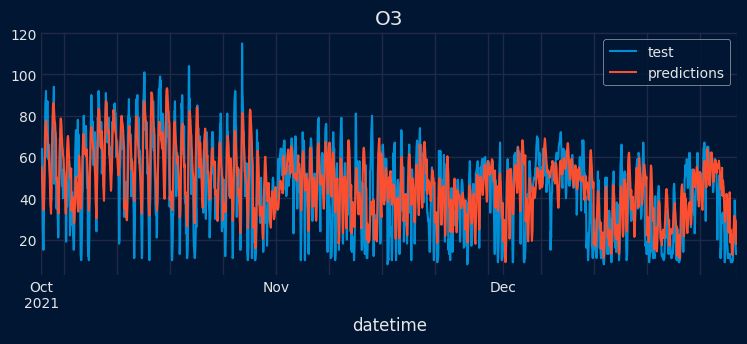

In [35]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["o3"].plot(ax=ax, label="test")
predictions.loc[predictions["level"] == "o3", "pred"].plot(ax=ax, label="predictions")
ax.set_title("O3")
ax.legend();

In [36]:
# Backtesting metrics
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,10.945903


In [37]:
# % Error vs series mean
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Serie mean: {np.mean(data['o3']):0.2f}")
print(f"Relative error (mae): {rel_mse:0.2f} %")

Serie mean: 54.52
Relative error (mae): 20.08 %


### 3. Multi-Series, Multi-Step Forecasting (N:1, Multiple Steps)

In this scenario, the goal is to predict future values of a **single target** time series by leveraging the past values of **multiple related series as predictors**. This is known as multivariate forecasting, where the model uses the historical data from several variables to improve the prediction of one specific series.

For example: Suppose you want to forecast ozone concentration (`o3`) for the next 24 hours. In addition to past `o3` values, you may include other series—such as temperature, wind speed, or other pollutant concentrations—as predictors. The model will then use the combined information from all available series to make a more accurate forecast.

**Model setup**

You can use the same model-building function, but now pass a DataFrame containing all relevant time series as series (or use the exog argument for external predictors). Make sure your data is properly aligned and synchronized.

In [40]:
# Create model
# ==============================================================================
model = create_and_compile_model(
    series                  = data,    # DataFrame with all series (predictors)
    levels                  = ["o3"],  # Target series to predict
    lags                    = 24,      # Number of lags to use as predictors
    steps                   = 24,      # multi-step forecasting
    recurrent_layer         = "GRU",
    recurrent_units         = [128, 64],
    recurrent_layers_kwargs = {"activation": "tanh"},
    dense_units             = [64, 32],
    compile_kwargs          = {'optimizer': 'adam', 'loss': 'mse'},
    model_name              = "MultiVariate-Multi-Step" 
)
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



Model: "MultiVariate-Multi-Step"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ series_input (InputLayer)       │ (None, 24, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 24, 128)        │        53,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_td_layer (Dense)   │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 24, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,040 (382.97 KB)

 Trainable params: 98,040 (382.97 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Forecaster Creation
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=["o3"],
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 50, 
        "batch_size": 512, 
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val,  # Validation data for model training.
    },
)

forecaster

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


============= 
ForecasterRnn 
============= 
Regressor: <Functional name=MultiVariate-Multi-Step, built=True> 
Layers names: ['series_input', 'gru_1', 'gru_2', 'dense_1', 'dense_2', 'output_dense_td_layer', 'reshape_5'] 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Maximum steps to predict: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Series names: None 
Target series (levels): ['o3'] 
Exogenous included: False 
Exogenous names: None 
Transformer for series: MinMaxScaler() 
Transformer for exog: MinMaxScaler() 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'name': 'MultiVariate-Multi-Step', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24, 10), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'series_input'}, 'registered_name': None, 'name': 'series_input', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 10]}, 'name': 'gru_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 10), 'dtype': 'float32', 'keras_history': ['series_input', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 128]}, 'name': 'gru_2', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 128), 'dtype': 'float32', 'keras_history': ['gru_1', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTyp

In [42]:
# Fit forecaster
# ==============================================================================
forecaster.fit(data_train)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.1319 - val_loss: 0.0503
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0337 - val_loss: 0.0274
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0264 - val_loss: 0.0255
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0250 - val_loss: 0.0245
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0238 - val_loss: 0.0229
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0224 - val_loss: 0.0213
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0206 - val_loss: 0.0193
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0187 - val_loss: 0.0190
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0179 - val_loss: 0.0188
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0177 - val_loss: 0.0191
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0173 - val_loss: 0.0178
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step

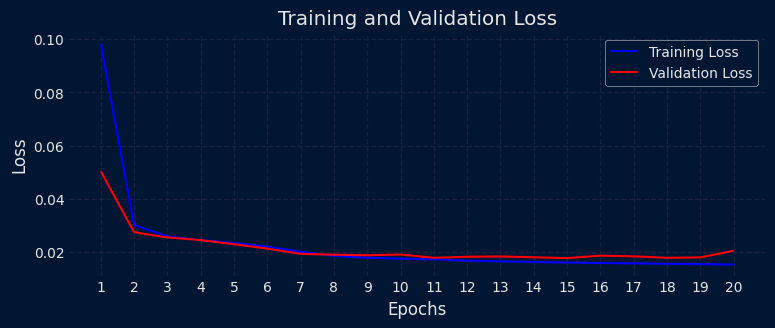

In [43]:
# Trainig and overfitting tracking
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
_ = forecaster.plot_history(ax=ax)

In [44]:
# Prediction
# ==============================================================================
predictions = forecaster.predict()
predictions.head(4)

,level,pred
2021-04-01 00:00:00,o3,54.274803
2021-04-01 01:00:00,o3,46.700275
2021-04-01 02:00:00,o3,44.058903
2021-04-01 03:00:00,o3,39.729561


In [45]:
# Backtesting with test data
# ==============================================================================
cv = TimeSeriesFold(
         steps              = forecaster.max_step,
         initial_train_size = len(data.loc[:end_validation, :]),  # Training + Validation Data
         refit              = False
     )

metrics, predictions = backtesting_forecaster_multiseries(
    forecaster        = forecaster,
    series            = data,
    cv                = cv,
    levels            = forecaster.levels,
    metric            = "mean_absolute_error",
    suppress_warnings = True,
    verbose           = False
)

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.0160 - val_loss: 0.0177
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0155 - val_loss: 0.0174
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0154 - val_loss: 0.0171
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0153 - val_loss: 0.0168
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0153 - val_loss: 0.0177
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0150 - val_loss: 0.0170
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0149 - val_loss: 0.0170
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0149 - val_loss: 0.0167
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0148 - val_loss: 0.0164
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0145 - val_loss: 0.0174
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0145 - val_loss: 0.0161
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step

  0%|          | 0/92 [00:00<?, ?it/s]

In [46]:
# Backtesting metrics
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,12.677898


In [47]:
# % Error vs series mean
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Serie mean: {np.mean(data['o3']):0.2f}")
print(f"Relative error (mae): {rel_mse:0.2f} %")

Serie mean: 54.52
Relative error (mae): 23.25 %


In [48]:
# Backtesting predictions
# ==============================================================================
predictions

,level,pred
2021-10-01 00:00:00,o3,50.581215
2021-10-01 01:00:00,o3,47.497776
2021-10-01 02:00:00,o3,42.912571
2021-10-01 03:00:00,o3,34.530376
2021-10-01 04:00:00,o3,31.093569
...,...,...
2021-12-31 19:00:00,o3,33.469406
2021-12-31 20:00:00,o3,14.048443
2021-12-31 21:00:00,o3,22.978424
2021-12-31 22:00:00,o3,4.912401


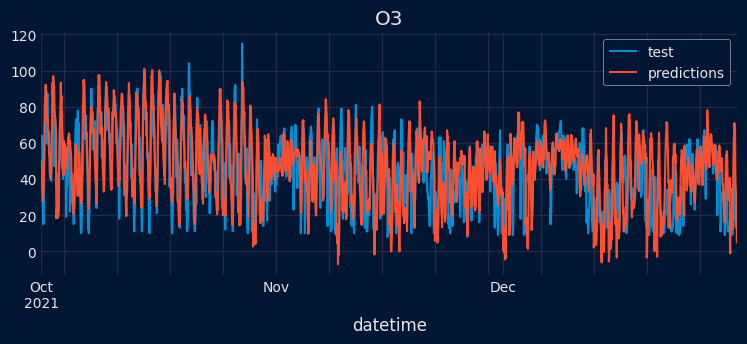

In [49]:
# Plotting predictions vs real values in the test set
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3))
data_test["o3"].plot(ax=ax, label="test")
predictions.loc[predictions["level"] == "o3", "pred"].plot(ax=ax, label="predictions")
ax.set_title("O3")
ax.legend()
plt.show()

### 4. Multi-Series, Multi-Step Forecasting (N:M, Multiple Steps)

In this scenario, the goal is to predict multiple future values for several time series at once, using the historical data from all available series as input. This is known as multivariate-multioutput forecasting.

With this approach, a single model learns to predict several target series simultaneously, capturing relationships and dependencies not only within each series, but also across different series.

Real-world applications include:

+ Forecasting the sales of multiple products in an online store, leveraging past sales, pricing history, promotions, and other product-related variables.

+ Modeling environmental variables (e.g., pollution, temperature, humidity) together, where the evolution of one variable may influence or be influenced by others.

In [69]:
# Create model
# ==============================================================================
levels = ['o3', 'pm2.5', 'pm10']  # Multiple target series to predict

model = create_and_compile_model(
    series                  = data,    # DataFrame with all series (predictors)
    levels                  = levels, 
    lags                    = 24, 
    steps                   = 24, 
    recurrent_layer         = "LSTM",
    recurrent_units         = [128, 64],
    recurrent_layers_kwargs = {"activation": "tanh"},
    dense_units             = [64, 32],
    compile_kwargs          = {'optimizer': 'adam', 'loss': 'mse'},
    model_name              = "MultiSeries-Multi-Step"
)
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



Model: "MultiSeries-Multi-Step"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ series_input (InputLayer)       │ (None, 24, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense_td_layer (Dense)   │ (None, 72)             │         2,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 24, 3)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,192 (504.66 KB)

 Trainable params: 129,192 (504.66 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Forecaster Creation
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 50, 
        "batch_size": 512, 
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val,  # Validation data for model training.
    },
)

forecaster

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


============= 
ForecasterRnn 
============= 
Regressor: <Functional name=MultiSeries-Multi-Step, built=True> 
Layers names: ['series_input', 'lstm_1', 'lstm_2', 'dense_1', 'dense_2', 'output_dense_td_layer', 'reshape_7'] 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Maximum steps to predict: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Series names: None 
Target series (levels): ['o3', 'pm2.5', 'pm10'] 
Exogenous included: False 
Exogenous names: None 
Transformer for series: MinMaxScaler() 
Transformer for exog: MinMaxScaler() 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'name': 'MultiSeries-Multi-Step', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24, 10), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'series_input'}, 'registered_name': None, 'name': 'series_input', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 10]}, 'name': 'lstm_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 10), 'dtype': 'float32', 'keras_history': ['series_input', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 128]}, 'name': 'lstm_2', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 128), 'dtype': 'float32', 'keras_history': ['lstm_1', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'mod

In [ ]:
# Fit forecaster
# ==============================================================================
forecaster.fit(data_train)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0544 - val_loss: 0.0318
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0172 - val_loss: 0.0188
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0121 - val_loss: 0.0160
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0107 - val_loss: 0.0146
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0098 - val_loss: 0.0134
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0089 - val_loss: 0.0124
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0082 - val_loss: 0.0123
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0079 - val_loss: 0.0125
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0079 - val_loss: 0.0125
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0078 - val_loss: 0.0122
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0076 - val_loss: 0.0125
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step

The prediction can also be made for specific `steps` and for specific `levels`, as long as they are within the prediction horizon defined in the model. For example, you can predict the next 1 and 5 hours (`steps = [1, 5]`) of ozone concentration (`level = 'o3'`).

In [72]:
# Specific step predictions
# ==============================================================================
forecaster.predict(steps=[1, 5], levels="o3")

,level,pred
2021-04-01 00:00:00,o3,43.119171
2021-04-01 04:00:00,o3,32.663101


In [73]:
# Prediction
# ==============================================================================
predictions = forecaster.predict()
predictions

,level,pred
2021-04-01 00:00:00,o3,43.119171
2021-04-01 00:00:00,pm2.5,11.480187
2021-04-01 00:00:00,pm10,14.864820
2021-04-01 01:00:00,o3,40.212242
2021-04-01 01:00:00,pm2.5,11.821278
...,...,...
2021-04-01 22:00:00,pm2.5,9.755165
2021-04-01 22:00:00,pm10,12.585145
2021-04-01 23:00:00,o3,45.194466
2021-04-01 23:00:00,pm2.5,10.330979


In [74]:
# Backtesting with test data
# ==============================================================================
cv = TimeSeriesFold(
         steps              = forecaster.max_step,
         initial_train_size = len(data.loc[:end_validation, :]),  # Training + Validation Data
         refit              = False
     )

metrics, predictions = backtesting_forecaster_multiseries(
    forecaster        = forecaster,
    series            = data,
    cv                = cv,
    levels            = forecaster.levels,
    metric            = "mean_absolute_error",
    suppress_warnings = True,
    verbose           = False
)

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0069 - val_loss: 0.0118
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0068 - val_loss: 0.0119
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0067 - val_loss: 0.0114
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0065 - val_loss: 0.0115
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0065 - val_loss: 0.0117
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0064 - val_loss: 0.0123
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0063 - val_loss: 0.0127
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0062 - val_loss: 0.0135


  0%|          | 0/92 [00:00<?, ?it/s]

In [75]:
# Backtesting metrics
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,13.895533
1,pm2.5,4.562698
2,pm10,12.046601
3,average,10.168277
4,weighted_average,10.168277
5,pooling,10.168277


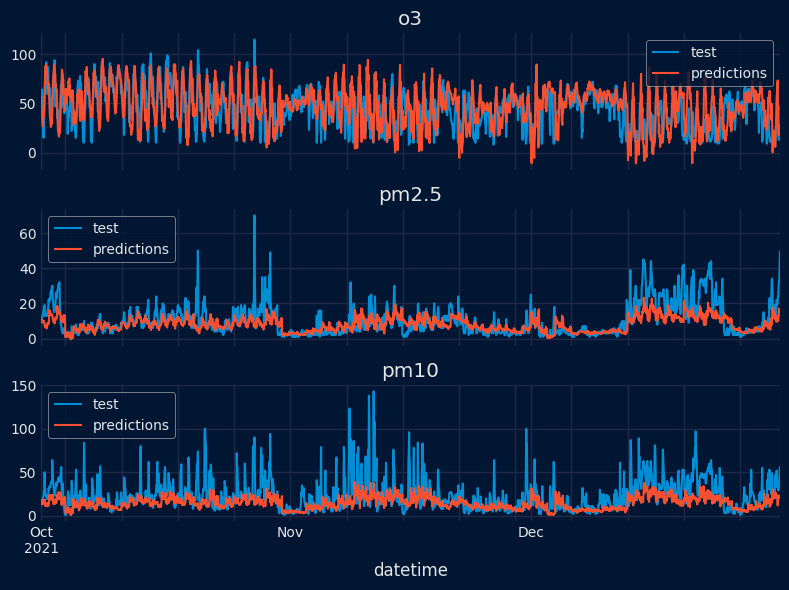

In [76]:
# Plot all the predicted variables as rows in the plot
# ==============================================================================
fig, ax = plt.subplots(len(levels), 1, figsize=(8, 2 * len(levels)), sharex=True)
for i, level in enumerate(levels):
    data_test[level].plot(ax=ax[i], label="test")
    predictions.loc[predictions["level"] == level, "pred"].plot(ax=ax[i], label="predictions")
    ax[i].set_title(level)
    ax[i].legend()

plt.tight_layout()
plt.show()

## Exogenous variables in deep learning models

Exogenous variables are predictors that are independent of the model being used for forecasting, and their future values must be known in order to include them in the prediction process.

In [84]:
# Create 'dayofweek' and 'hour' as exogenous variables
# ==============================================================================
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour

end_train = "2021-03-31 23:59:00"
end_validation = "2021-09-30 23:59:00"
data_train = data.loc[:end_train, :].copy()
data_val = data.loc[end_train:end_validation, :].copy()
data_test = data.loc[end_validation:, :].copy()

data.head(3)

,so2,co,no,no2,pm10,nox,o3,veloc.,direc.,pm2.5,dayofweek,hour
datetime,,,,,,,,,,,,
2019-01-01 00:00:00,8.0,0.2,3.0,36.0,22.0,40.0,16.0,0.5,262.0,19.0,1,0
2019-01-01 01:00:00,8.0,0.1,2.0,40.0,32.0,44.0,6.0,0.6,248.0,26.0,1,1
2019-01-01 02:00:00,8.0,0.1,11.0,42.0,36.0,58.0,3.0,0.3,224.0,31.0,1,2


The architecture of your deep learning model must be able to accept extra inputs alongside the main time series data. The `create_and_compile_model` function makes this straightforward: simply pass the exogenous variables as a DataFrame to the `exog` argument.

In [85]:
# Advance usage of `create_and_compile_model`
# ==============================================================================
series = ['so2', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.', 'pm2.5']
exog = ['dayofweek', 'hour']
levels = ['o3', 'pm2.5', 'pm10']  # Multiple target series to predict

model = create_and_compile_model(
    series                  = data[series],  # DataFrame with all series (predictors)
    levels                  = levels, 
    lags                    = 24, 
    steps                   = 24, 
    exog                    = data[exog],    # Exogenous variables
    recurrent_layer         = "LSTM",
    recurrent_units         = [128, 64],
    recurrent_layers_kwargs = {"activation": "tanh"},
    dense_units             = [64, 32],
    compile_kwargs          = {'optimizer': 'adam', 'loss': 'mse'},
    model_name              = "MultiSeries-Multi-Step-Exog"
)
model.summary()

keras version: 3.10.0
Using backend: tensorflow
tensorflow version: 2.19.0



Model: "MultiSeries-Multi-Step-Exog"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ series_input        │ (None, 24, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 24, 128)   │     71,168 │ series_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     49,408 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 24, 64)    │          0 │ lstm_2[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ exog_input          │ (None, 24, 2)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_exog         │ (None, 24, 66)    │          0 │ repeat_vector[0]… │
│ (Concatenate)       │                   │            │ exog_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_td_1          │ (None, 24, 64)    │      4,288 │ concat_exog[0][0] │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_td_2          │ (None, 24, 32)    │      2,080 │ dense_td_1[0][0]  │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_dense_td_la… │ (None, 24, 3)     │         99 │ dense_td_2[0][0]  │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 127,043 (496.26 KB)

 Trainable params: 127,043 (496.26 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
# Plotting the model architecture (require `pydot` and `graphviz`)
# ==============================================================================
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model-architecture-exog.png')

<p style="text-align: center">
    <img src='../img/model-architecture-exog.png'style="width: 400px">
</p>

In [87]:
# Forecaster Creation
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    transformer_exog=MinMaxScaler(),
    fit_kwargs={
        "epochs": 50, 
        "batch_size": 512, 
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val[series],  # Validation data for model training.
        "exog_val": data_val[exog]  # Validation data for exogenous variables
    },
)

forecaster

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)
c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


============= 
ForecasterRnn 
============= 
Regressor: <Functional name=MultiSeries-Multi-Step-Exog, built=True> 
Layers names: ['series_input', 'lstm_1', 'lstm_2', 'repeat_vector', 'exog_input', 'concat_exog', 'dense_td_1', 'dense_td_2', 'output_dense_td_layer'] 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Maximum steps to predict: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Series names: None 
Target series (levels): ['o3', 'pm2.5', 'pm10'] 
Exogenous included: True 
Exogenous names: None 
Transformer for series: MinMaxScaler() 
Transformer for exog: MinMaxScaler() 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'name': 'MultiSeries-Multi-Step-Exog', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 24, 10), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'series_input'}, 'registered_name': None, 'name': 'series_input', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 10]}, 'name': 'lstm_1', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 10), 'dtype': 'float32', 'keras_history': ['series_input', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 24, 128]}, 'name': 'lstm_2', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 24, 128), 'dtype': 'float32', 'keras_history': ['lstm_1', 0, 0]}},), 'kwargs': {'training': False, 'mask': None}}]}, {'module': 'keras.layers', 'class_name': 'RepeatVector', 'config'

In [ ]:
# Fit forecaster with exogenous variables
# ==============================================================================
forecaster.fit(series=data_train[series], exog=data_train[exog])

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0229 - val_loss: 0.0181
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0103 - val_loss: 0.0146
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - loss: 0.0096 - val_loss: 0.0133
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0091 - val_loss: 0.0125
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0088 - val_loss: 0.0121
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - loss: 0.0083 - val_loss: 0.0115
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - loss: 0.0080 - val_loss: 0.0109
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - loss: 0.0075 - val_loss: 0.0114
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - loss: 0.0074 - val_loss: 0.0112
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - loss: 0.0071 - val_loss: 0.0109
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0069 - val_loss: 0.0114
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/ste

In [ ]:
# Prediction with exogenous variables
# ==============================================================================
predictions = forecaster.predict(exog=data_val[exog])
predictions

,level,pred
2021-04-01 00:00:00,o3,34.756138
2021-04-01 00:00:00,pm2.5,11.565928
2021-04-01 00:00:00,pm10,12.577684
2021-04-01 01:00:00,o3,36.316826
2021-04-01 01:00:00,pm2.5,10.972984
...,...,...
2021-04-01 22:00:00,pm2.5,9.262781
2021-04-01 22:00:00,pm10,10.515613
2021-04-01 23:00:00,o3,51.453869
2021-04-01 23:00:00,pm2.5,9.616577


In [90]:
# Backtesting with test data and exogenous variables
# ==============================================================================
cv = TimeSeriesFold(
         steps              = forecaster.max_step,
         initial_train_size = len(data.loc[:end_validation, :]),  # Training + Validation Data
         refit              = False
     )

metrics, predictions = backtesting_forecaster_multiseries(
    forecaster        = forecaster,
    series            = data[series],
    exog              = data[exog],
    cv                = cv,
    levels            = forecaster.levels,
    metric            = "mean_absolute_error",
    suppress_warnings = True,
    verbose           = False
)

c:\Users\jaesc2\Miniconda3\envs\skforecast_py12\Lib\site-packages\keras\src\backend\tensorflow\core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  return np.array(x)


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0065 - val_loss: 0.0101
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0064 - val_loss: 0.0105
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 0.0063 - val_loss: 0.0104
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0062 - val_loss: 0.0104
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 0.0061 - val_loss: 0.0100
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - loss: 0.0061 - val_loss: 0.0104
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0060 - val_loss: 0.0105
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0061 - val_loss: 0.0112
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.0059 - val_loss: 0.0110
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0058 - val_loss: 0.0111


  0%|          | 0/92 [00:00<?, ?it/s]

In [91]:
# Backtesting metrics
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,14.165478
1,pm2.5,4.836815
2,pm10,11.502794
3,average,10.168362
4,weighted_average,10.168362
5,pooling,10.168362


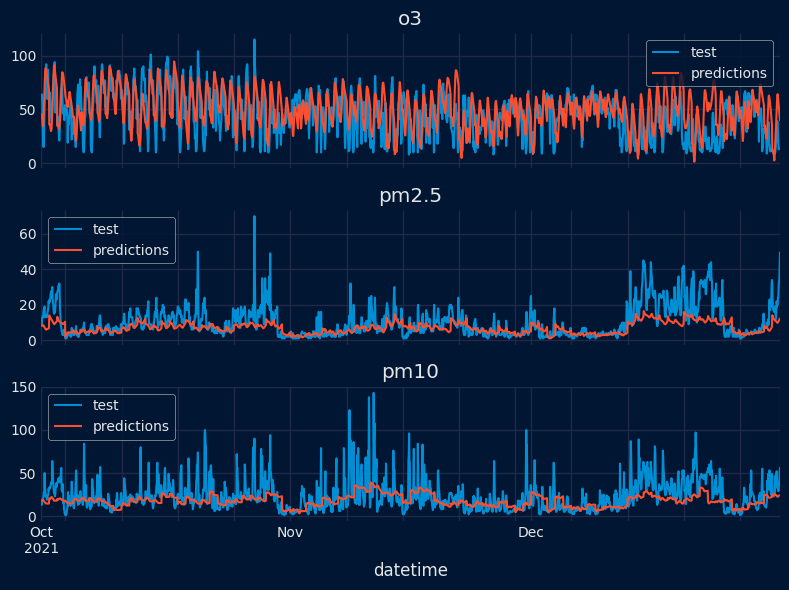

In [93]:
# Plot all the predicted variables as rows in the plot
# ==============================================================================
fig, ax = plt.subplots(len(levels), 1, figsize=(8, 2 * len(levels)), sharex=True)
for i, level in enumerate(levels):
    data_test[level].plot(ax=ax[i], label="test")
    predictions.loc[predictions["level"] == level, "pred"].plot(ax=ax[i], label="predictions")
    ax[i].set_title(level)
    ax[i].legend()

plt.tight_layout()
plt.show()

## Probabilistic forecasting with deep learning models

Conformal prediction is a framework for constructing prediction intervals that are guaranteed to contain the true value with a specified probability (coverage probability). It works by combining the predictions of a point-forecasting model with its past residuals—differences between previous predictions and actual values. These residuals help estimate the uncertainty in the forecast and determine the width of the prediction interval that is then added to the point forecast.

To learn more about conformal predictions in skforecast, visit the [Probabilistic Forecasting: Conformal Prediction](../user_guides/probabilistic-forecasting-conformal-prediction.html) user guide.

In [96]:
# Fit forecaster with exogenous variables
# ==============================================================================
forecaster.set_in_sample_residuals(
    series=data_train[series], exog=data_train[exog]
)

In [98]:
# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
    steps                   = 24,
    exog                    = data_val.loc[:, exog],
    interval                = [10, 90],  # 80% prediction interval
    method                  = 'conformal',
    use_in_sample_residuals = True
)
predictions

,level,pred,lower_bound,upper_bound
2021-04-01 00:00:00,o3,34.756139,10.438125,59.074154
2021-04-01 00:00:00,pm2.5,11.565928,5.565467,17.566390
2021-04-01 00:00:00,pm10,12.577684,1.565725,23.589642
2021-04-01 01:00:00,o3,36.316826,11.998812,60.634840
2021-04-01 01:00:00,pm2.5,10.972985,4.972523,16.973446
...,...,...,...,...
2021-04-01 22:00:00,pm2.5,9.262781,3.262320,15.263242
2021-04-01 22:00:00,pm10,10.515613,-0.496345,21.527572
2021-04-01 23:00:00,o3,51.453868,27.135853,75.771882
2021-04-01 23:00:00,pm2.5,9.616577,3.616116,15.617038


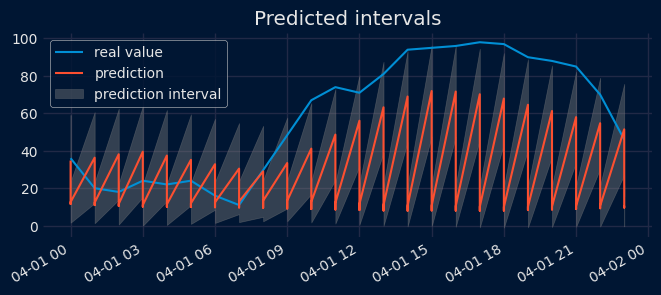

In [ ]:
# Plot intervals
# ==============================================================================
plot_prediction_intervals(
    predictions         = predictions,
    y_true              = data_val,
    target_variable     = "o3",
    title               = "Predicted intervals",
    kwargs_fill_between = {'color': 'gray', 'alpha': 0.4, 'zorder': 1}
)

## Create and compile Tensorflow models

To improve the user experience and speed up the prototyping, development, and production process, skforecast has the `create_and_compile_model` function, with which, by indicating just a few arguments, the architecture is inferred and the model is created.

+ `series`: Time series to be used to train the model

+ `levels`: Time series to be predicted.
  
+ `lags`: Number of time steps to be used to predict the next value.

+ `steps`: Number of time steps to be predicted.

+ `recurrent_layer`: Type of recurrent layer to use. By default, an LSTM layer is used.
  
+ `recurrent_units`: Number of units in the recurrent layer. By default, 100 is used. If a list is passed, a recurrent layer will be created for each element in the list.

+ `dense_units`: Number of units in the dense layer. By default, 64 is used. If a list is passed, a dense layer will be created for each element in the list.
  
+ `optimizer`: Optimizer to use. By default, Adam with a learning rate of 0.01 is used.
  
+ `loss`: Loss function to use. By default, Mean Squared Error is used.


<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px; padding-right: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

The following examples use <code>recurrent_layer="LSTM"</code> but it is also possible to use <code>"RNN"</code> layers.

</div>

In [45]:
# Create model
# ==============================================================================
series = ["o3"]  # Series used as predictors
levels = ["o3"]  # Target series to predict
lags = 32        # Past time steps to be used to predict the target
steps = 1        # Future time steps to be predicted

data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=4,
    dense_units=16,
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 1, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In this case, a simple LSTM network is used, with a single recurrent layer with 4 neurons and a hidden dense layer with 16 neurons. The following table shows a detailed description of each layer:


| Layer                        | Type            | Output Shape      | Parameters  | Description                                                                                         |
|-----------------------------|-----------------|-------------------|-------------|-----------------------------------------------------------------------------------------------------|
| Input Layer (InputLayer)    | `InputLayer`    | `(None, 32, 1)`   | 0           | This is the input layer of the model. It receives sequences of length 32, corresponding to the number of lags with a dimension at each time step. |
| LSTM Layer (Long Short-Term Memory)| `LSTM`       | `(None, 4)`       | 96          | The LSTM layer is a long and short-term memory layer that processes the input sequence. It has 4 LSTM units and connects to the next layer.  |
| First Dense Layer (Dense)   | `Dense`         | `(None, 16)`      | 80          | This is a fully connected layer with 16 units and uses a default activation function (relu) in the provided architecture.     |
| Second Dense Layer (Dense)  | `Dense`         | `(None, 1)`       | 17          | Another fully connected dense layer, this time with a single output unit. It also uses a default activation function.          |
| Reshape Layer (Reshape)     | `Reshape`       | `(None, 1, 1)`    | 0           | This layer reshapes the output of the previous dense layer to have a specific shape `(None, 1, 1)`. This layer is not strictly necessary, but is included to make the module generalizable to other multi-output forecasting problems. The dimension of this output layer is `(None, steps_to_predict_future, series_to_predict)`. In this case, `steps=1 and levels="o3"`, so the dimension is `(None, 1, 1)`  |
| Total Parameters and Trainable | -           | -                 | 193         | Total Parameters: 193, Trainable Parameters: 193, Non-Trainable Parameters: 0               |


More complex models can be created including:

* Multiple series to be modeled (levels)
* Multiple series to be used as predictors (series)
* Multiple steps to be predicted (steps)
* Multiple lags to be used as predictors (lags)
* Multiple recurrent layers (recurrent_units)
* Multiple dense layers (dense_units)

In [46]:
# Model creation
# ==============================================================================
# Now, we have multiple series and multiple targets
series = ['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.', 'so2'] 
levels = ['pm2.5', 'co', 'no', "o3"]  # Features to predict. It can be all the series or less
lags = 32 
steps = 5 

data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 50],
    dense_units=[64, 32],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 5, 4)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,604 (314.86 KB)

 Trainable params: 80,604 (314.86 KB)

 Non-trainable params: 0 (0.00 B)

## Running on GPU

The **skforecast** library is fully compatible with GPUs, enabling accelerated computation during model training when the appropriate hardware and software configurations are in place. If a compatible GPU is detected and properly configured, **skforecast** will automatically utilize the GPU to speed up the training process, especially for large and complex models.

### GPU Performance and Batch Size Considerations
The performance gains from using a GPU are most noticeable when training with larger batch sizes. This is because GPUs are optimized for parallel processing, and larger batches allow the GPU to process more data simultaneously. However, if the batch size is too small, the benefits of using the GPU over the CPU may be minimal.

- **Optimal Batch Size**: For most models, increasing the batch size to values such as **64**, **128**, or **1024** can yield significant performance improvements. Training with small batch sizes may result in the GPU performing similarly to the CPU.
- **Example Performance Gain**: For larger models and batches, you may experience substantial improvements in training times. For instance, on an **NVIDIA T4 GPU**, training time was reduced from **1m 20s** on the CPU to just **6 seconds** on the GPU when using larger batches.

### Setting Up and Using the GPU
To run models on the GPU using **skforecast**, ensure the following:
1. The GPU is properly installed and configured on your machine.
2. The necessary dependencies, including PyTorch with CUDA support, are installed.
3. The GPU is detected correctly by PyTorch using `torch.cuda.is_available()`.

Once these configurations are in place, no further modifications are needed to use the GPU with **skforecast**. The library will automatically leverage GPU resources when available, providing faster training times.

---

### Example Code: Model Creation and Training

```python
# Create model
# ==============================================================================
series = ["o3"]  # Series used as predictors
levels = ["o3"]  # Target series to predict
lags = 32  # Past time steps to be used to predict the target
steps = 1  # Future time steps to be predicted

data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 100, 100, 100],
    dense_units=[64, 32, 16, 8],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

# Forecaster Definition
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 3,  # Number of epochs to train the model.
        "batch_size": 512,  # Batch size to train the model.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback to stop training when it is no longer learning.
        "series_val": data_val,  # Validation data for model training.
    },
)    

# Fit forecaster
# ==============================================================================
forecaster.fit(data_train)
```

### Conclusion
Once your GPU is properly configured, **skforecast** will automatically detect it and accelerate training, reducing computation time significantly for larger models and datasets. The key to maximizing GPU performance lies in selecting an appropriate batch size. Larger batch sizes allow the GPU to utilize its parallel processing power effectively, leading to faster training times.

## Get training and test matrices

In [47]:
# Model creation
# ==============================================================================
series = ['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.', 'so2'] 
levels = ['pm2.5', 'co', 'no', "o3"]  # Features to predict. It can be all the series or less
lags = 10 
steps = 5 

data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 50],
    dense_units=[64, 32],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)

forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    steps=steps,
    lags=lags,
)
forecaster

keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


ForecasterRnn 
Regressor: <Functional name=functional_6, built=True> 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Transformer for series: MinMaxScaler() 
Window size: 10 
Target series, levels: ['pm2.5', 'co', 'no', 'o3'] 
Multivariate series (names): None 
Maximum steps predicted: [1 2 3 4 5] 
Training range: None 
Training index type: None 
Training index frequency: None 
Model parameters: {'name': 'functional_6', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 10, 10), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_6'}, 'registered_name': None, 'name': 'input_layer_6', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_12', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'z

In [48]:
forecaster.create_train_X_y(data_train)[2]["X_train"][2]

['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.', 'so2']

The RNN Forecaster can also be used to generate the X_train and y_train matrices that will be used to train the model. The `create_train_X_y` method allows the user to obtain the training and test matrices that will be used to train the model. The method return 3 elements: X_train, y_train, and dimension_information. The X_train matrix has dimensions `(n_samples, n_lags, n_series)`, while the y_train matrix has dimensions `(n_samples, n_steps, n_levels)`.



In [49]:
X_train, y_train, dimension_info = forecaster.create_train_X_y(data_train)

In [50]:
X_train.shape, y_train.shape

((19690, 10, 10), (19690, 5, 4))

The dimension_information dictionary contains the information of each dimension value for both X_train and y_train.

In [51]:
dimension_info["X_train"][0][:10]

[Timestamp('2019-01-01 10:00:00'),
 Timestamp('2019-01-01 11:00:00'),
 Timestamp('2019-01-01 12:00:00'),
 Timestamp('2019-01-01 13:00:00'),
 Timestamp('2019-01-01 14:00:00'),
 Timestamp('2019-01-01 15:00:00'),
 Timestamp('2019-01-01 16:00:00'),
 Timestamp('2019-01-01 17:00:00'),
 Timestamp('2019-01-01 18:00:00'),
 Timestamp('2019-01-01 19:00:00')]

In [52]:
dimension_info["X_train"][1]

['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10']

In [53]:
dimension_info["X_train"][2]

['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.', 'so2']

In [54]:
dimension_info["y_train"][0][:10]

[Timestamp('2019-01-01 10:00:00'),
 Timestamp('2019-01-01 11:00:00'),
 Timestamp('2019-01-01 12:00:00'),
 Timestamp('2019-01-01 13:00:00'),
 Timestamp('2019-01-01 14:00:00'),
 Timestamp('2019-01-01 15:00:00'),
 Timestamp('2019-01-01 16:00:00'),
 Timestamp('2019-01-01 17:00:00'),
 Timestamp('2019-01-01 18:00:00'),
 Timestamp('2019-01-01 19:00:00')]

In [55]:
dimension_info["y_train"][1]

['step_1', 'step_2', 'step_3', 'step_4', 'step_5']

In [56]:
dimension_info["y_train"][2]

['pm2.5', 'co', 'no', 'o3']